In [ ]:
Scikit learn 

In [ ]:
#Module 2 : Classification à l'aide d'une régression logistique --------------------------------------------------------------
 
# A ------------------------------------------------------------------------------ Préparation et modélisation des données 

#1 -------------------------------------- Import

from sklearn import  linear_model , preprocessing 
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np

df = pd.read_csv ('admissions.csv')
df.head()
df.info()

#2 -------------------------------------- Préparation des données ( variables continues)

# Préparation des données (supression des lignes avec des vides)  :

df.isnull().any()  
df = df.dropna(how='any', subset=['gre'])

# modélisation des données:

pd.crosstab(df['admit'],df['gre'].mean())  #crosstab
df.groupby ('admit').agg({'gre' : 'mean'}) #groupby

#fct cut (retourne une serie) : Etape - discrétiser les variables quantitatives
prestige = pd.cut(df['prestige'], [0.0, 1.0, 2.0, 3.0, 4.0], labels =['mauvais', 'moyen', 'moyen+', 'bon'])

#fct get_dummies (retourne un df depuis une serie) 
pd.get_dummies (prestige)

#fct join (join un df a un autre) : Etape de dichotomisation
df = df.join(pd.get_dummies (prestige,prefix ='prestige') )

#3 -------------------------------------- Separation des données 

#Les variables explicatives, en anglais features, 
#de chaque candidat sont représentées dans data 
#La variable à prédire est admit.

data = df.iloc[0:,4:] #df 1

target = df['admit'] #df 2

#4 -------------------------------------- Diviser les matrices en un ensemble d'entraînement et un ensemble de test 
#il faut systématiquement diviser les données
#en un ensemble d'entraînement (X_train et y_train)
#et un ensemble de test (X_test et y_test).

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 66) 



# B ------------------------------------------------------------------------------ Classification par régression logistique

#1 --------------------------------------  entraîner notre modèle
#Pour construire un modèle de classification, 
#il faut entraîner notre modèle sur l'ensemble d'entraînement uniquement.
clf = linear_model.LogisticRegression(C = 1.0)
clf.fit(X_train, y_train)

#2 --------------------------------------  calculer la prédiction
#Il est alors possible de calculer la prédiction
#pour les données présentes dans l'ensemble de test, et construire la matrice de confusion.
y_pred = clf.predict(X_test)

#3 -------------------------------------- Calcul de la matrice de confusion 

## Méthode 1 : à l'aide de sklearn
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
print(cm)

## Méthode 2 : à l'aide de pandas
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

#La matrice de confusion, ci-dessus, 
#illustre que le nombre de bonnes classifications (sur la diagonale) 
#est supérieur au nombre de mauvaises classifications.

#4 -------------------------------------- le taux de bonnes prédictions du modèle (l'accuracy )
(35+43)/(35+43+14+13)

#ou

clf.score(X_test, y_test)

#5 -------------------------------------- La fonction classification_report()
#permet d'afficher certaines de ces métriques supplémentaires, 
#avec comme arguments le vecteur des vrais labels, et celui des labels prédits

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

#6 -------------------------------------- la méthode predict_proba ()
#retourne, pour des individus donnés, 
#non pas les prédictions de classes mais les probabilités d'appartenir à chacune des deux classes.

probs = clf.predict_proba(X_test)

y_preds = np.where(probs[:,1]>0.4,1,0)

cm = pd.crosstab(y_test, y_preds, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

#7 -------------------------------------- la méthode predict_proba ()

In [ ]:
#Module 3 : Classification de vins à l'aide des Support Vector Machine (SVM)  --------------------------------------------------
#SVM ne fonctionnent pas avec des variables non numériques

# A ------------------------------------------------------------------------------ Préparation et modélisation des données 

#1 -------------------------------------- Import

import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

wine = pd.read_csv("wine.csv")


#2 -------------------------------------- Préparation des données ( variables continues)

# Préparation des données (supression des lignes avec des vides)  :

df.isnull().any()  
df = df.dropna(how='any', subset=['gre'])


#3 -------------------------------------- Separation des données 

#Les variables explicatives, en anglais features, 
#de chaque candidat sont représentées dans data 
#La variable à prédire est admit.

data = df.iloc[0:,4:] #df 1
target = df['admit'] #df 2


#4 -------------------------------------- Diviser les matrices en un ensemble d'entraînement et un ensemble de test 
#il faut systématiquement diviser les données
#en un ensemble d'entraînement (X_train et y_train)
#et un ensemble de test (X_test et y_test).

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 66) 


#5 -------------------------------------- Standardisation

#Standardisation classique
X_train_scaled= preprocessing.scale(X_train)

print(X_train_scaled.mean(axis=0))  #la moyenne et l'écart type des colonnes de X_train_scaled.
print(X_train_scaled.std(axis=0))

#Standardisation prefere
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

print(X_train_scaled.mean(axis=0))  #la moyenne et l'écart type des colonnes de X_train_scaled.
print(X_train_scaled.std(axis=0))


# B ----------------------------------------------------------------------Classification par les machines à vecteurs de support

#1 --------------------------------------  entraîner notre modèle
clf = svm.SVC(gamma=0.01,  kernel='poly')
clf.fit(X_train_scaled, y_train)

# C ------------------------------------------------------------------------------ Évaluation du modèle de classification

#1 --------------------------------------   prédiction pour les données 

y_pred = clf.predict(X_test_scaled)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

#analyse et si resultat non satisfesant - > le modele change bcp avec les params

# D ------------------------------------------------------------------------------ Évaluation du modèle de classification

#1 -------------------------------------- creation du dict parametres  
parametres = {'C':[0.1,1,10],'kernel':['rbf','linear', 'poly'], 'gamma':[0.001, 0.1, 0.5]}  #dict parametre 


#2 -------------------------------------- creation du new modele classificateur avec le jeu de param
grid_clf = model_selection.GridSearchCV(estimator=clf, param_grid=parametres) #creation du new modele 


#3 -------------------------------------- entrainement du new modele
grille = grid_clf.fit(X_train_scaled,y_train)   #entrainement du new modele


#4 -------------------------------------- affficher les combi d'hyperparamètres (optionel)
#juste pour voir plusieur jeu de param 
print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,["params","mean_test_score"]]) #toutes les combi d'hyperparamètres

#5 -------------------------------------- choix du meilleurs paramètres
print(grid_clf.best_params_)#les meilleurs paramètres de la grille pour notre modèle grid_clf

#6 -------------------------------------- Prédiction des features test et création de la matrice de confusion
#Prédiction des features test et création de la matrice de confusion
y_pred = grid_clf.predict(X_test_scaled)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])


#E ------------------------------------------------------------------------------ BONUS : la courbe d'apprentissage du modèle
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
%matplotlib inline 

train_sizes, train_scores, valid_scores = learning_curve(svm.SVC(kernel='linear', C= 1), data, target, train_sizes=[50, 80, 110, 140], cv=5)

plt.xlabel("Training examples")
plt.ylabel("Score")

train_sizes=[50, 70, 80, 100, 110, 118]

train_sizes, train_scores, test_scores = learning_curve(
    grid_clf, data, target, n_jobs=4, train_sizes=train_sizes)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")

In [ ]:
#Module 4 : Méthode des k plus proches voisins  ------------------------------------------------------------------------------
#L'algorithme k-NN est simple mais puissant. 
#L'avantage est qu'il ne requière aucun entraînement de modèle pour réaliser des prédictions, 
#alors que c'est en général la partie la plus compliquée d'un algorithme de Machine Learning.
#Il est utilisé dans de nombreux domaines, notamment : 
#    la reconnaissance de formes, les algorithmes de compression, le marketing ciblé.

#En revanche, c'est un classifieur très gourmand en mémoire, sensible aux attributs non pertinents et corrélés.
#Pour un jeu de données de grande dimension, la prédiction sera lente car 
#l'algorithme parcoure, pour chaque individu à classer, l'ensemble des données de l'échantillon d'apprentissage.

# A ------------------------------------------------------------------------------ Préparation et modélisation des données 

#1 -------------------------------------- Import
# Import des bibliothèques nécessaires
from sklearn import neighbors
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


#2 -------------------------------------- datasets
digits = datasets.load_digits()  #import depuis 

X_digits = pd.DataFrame(digits.data)   #separation
y_digits = digits.target

#3 -------------------------------------- Divisez les matrices en un ensemble d'apprentissage
#X_digits et y_digits en un ensemble d'apprentissage de 80% (X_train, y_train) et un ensemble de test (X_test, y_test) de 20%.

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size = 0.2, random_state=126)



# B ------------------------------------------------------------------------------ Apprentissage des données 
# Création du classificateur knn et construction du modèle sur les données d'entraînement
knn = neighbors.KNeighborsClassifier(n_neighbors=7, metric='minkowski')
knn.fit(X_train, y_train)# Ajustement du classifieur sur l'ensemble d'entraînement (X_train et y_train)



# C ------------------------------------------------------------------------------ Évaluation du modèle de classification 
# L’évaluation est la clé de la réussite en data science. 
# Elle vise à vérifier le(s) modèle(s) ou les connaissances obtenues afin de s’assurer qu’ils répondent aux objectifs formulés. 
# Elle contribue aussi à la décision de déploiement du modèle ou à son amélioration. 
# A ce stade, on teste notamment la robustesse et la précision des modèles obtenus.

#1 -------------------------------------- prédictions
y_pred = knn.predict(X_test)  #prédictions obtenues

#2 -------------------------------------- voir le result avec matrice de confusion
#matrice de confusion pour comparer les classes réelles et prédites.
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite']) 
knn.score(X_test, y_test)

#Le modèle crée paraît déjà assez performant sur l'ensemble de test. 
#Sur 360 chiffres écrits testés, seul trois chiffres 5 et quatre chiffres 9 ont été mal classés.
#Le modèle peut cependant peut-être être amélioré, en choisissant une distance différente, ou un autre nombre de 'voisins'.

#3 -------------------------------------- datasets
knn_m = neighbors.KNeighborsClassifier(n_neighbors=5, metric='manhattan') #nouveau Classificateur knn_m, avec param diff
knn_m.fit(X_train, y_train)


#Score du modèle utilisant la distance de minkowski
score_minkowski = knn.score(X_test, y_test)

#Score du modèle utilisant la distance de manhattan
score_manhattan = knn_m.score(X_test, y_test)

score_minkowski, score_manhattan

In [ ]:
#Module 5 : Algorithmes de Arbres de décision   ---------------------------------------------------------------------------

# A ------------------------------------------------------------------------------ Préparation et modélisation des données 

#1 -------------------------------------- Import package
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

bc_data = pd.read_csv("breast_cancer.csv", index_col = 0)

#2 -------------------------------------- Separation data target
data = bc_data.drop('diagnosis', axis =1)
target = bc_data.diagnosis


# B ------------------------------------------------------------------------------ Apprentissage des données

#1 -------------------------------------- Entrainement
#separation du jeu de données en ensembles d'apprentissage et de test,
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=123) #separation 

#creation du clasifieur
dt_clf = DecisionTreeClassifier(criterion = "entropy", max_depth=4, random_state= 123)

#entrainement
dt_clf.fit(X_train, y_train)


#2 -------------------------------------- prediction puis evaluation

y_pred =dt_clf.predict(X_test)  #prediction 

pd.crosstab ( y_test , y_pred , rownames= ['real'],     #affichage du result
    colnames= ['predict'] )

#analyse

#3 -------------------------------------- determine les var importantes
#determine les 8 variables les plus importantes pour dt_clf, ainsi que leurs importances respectives
feats = {}
for feature, importance in zip(data.columns, dt_clf.feature_importances_):
    feats[feature] = importance 
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances.sort_values(by='Importance', ascending = False ).head(8)

#4 -------------------------------------- Creation d un new modele + entrainement + predict + result
dt_clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth=4, random_state=321)
dt_clf_gini.fit(X_train, y_train)
y_pred = dt_clf_gini.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

In [ ]:
#Module 5 : Algorithmes de Boosting et de Bagging  ---------------------------------------------------------------------------

# A ------------------------------------------------------------------------------ Le Boosting 

#1 -------------------------------------- Import package

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np


#2 -------------------------------------- import csv
df= pd.read_csv("letter-recognition.csv")
df.info()  #la col lettre est pas integer 


#3 -------------------------------------- data / target
data = df.drop('letter', axis=1)
target = df['letter']


#4 -------------------------------------- jeu d'apprentissage et un jeu de test
# test_size = 0.3 : La taille du jeu de test doit correspondre à 30 % de la quantité totale des données disponibles
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3)




# B --------------------------------------------------------------------------- Classification supervisée par arbre de décision
#1 -------------------------------------- creation du  modèle de classification dtc
# un modèle de classification dtc, ayant pour paramètre max_depth = 5
dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train, y_train)



# C --------------------------------------------------------------------------- Évaluation du premier modèle de classification

#1 -------------------------------------- évaluation du modèle 
dtc.score(X_test, y_test) #eval sur la précision moyenne sur l'ens des données de test
#donne le taux de bonne prédiction 

#2 -------------------------------------- prédictions
y_pred = dtc.predict(X_test)  # prédictions du modèle sur X_test


#3 -------------------------------------- une matrice de confusion
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])



# D ------------------------------------------------------------------------------------------- Algorithme de Boosting Adaboost
#Adaboost comme algorithme de Boosting

#1 -------------------------------------- creation du  modèle de classification dtc
# Création du classifier et construction du modèle sur les données d'entraînement
ac = AdaBoostClassifier(base_estimator= dtc, n_estimators= 400)
ac.fit(X_train, y_train) #entrainement

ac.score(X_test,y_test) # Calcul de l'accuracy

#1 -------------------------------------- Afficher la matrice de confusion de l'ensemble de test.
y_pred = ac.predict(X_test)
pd.crosstab(y_test, y_pred)


# E --------------------------------------------------------------------------------------- Le Bagging ou Bootstrap AGGregatING
# Le terme Bagging vient de la contraction de Boostrap Aggregating
# visant à réduire la variance et à augmenter la stabilité des algorithmes

#1 -------------------------------------- creation du  modèle de classification bc
# Création du classifier et construction du modèle sur les données d'entraînement

from sklearn.ensemble import BaggingClassifier  #import

bc = BaggingClassifier(n_estimators = 1000, oob_score = True)  #Création du classifier et construction du modèle
bc.fit(X_train, y_train)  #entrainement 

bc.oob_score_  # return l'erreur Out Of Bag du modèle grâce à l'attribut oob_score_

#2 -------------------------------------- accuracy du nouveau modèle
# l'accuracy (taux de bonnes prédiction) du nouveau modèle de classification sur l'échantillon de test
bc.score(X_test, y_test)

#3 --------------------------------------  la matrice de confusion de l'ensemble de test.
y_pred = bc.predict(X_test)
pd.crosstab(y_test, y_pred)

#analyse des 2 resultats et comparaison



In [ ]:
#Module 6 : Algorithmes : Les forêts aléatoires -------------------------------------------------------------------------------

# A ------------------------------------------------------------------------------ Les forêts aléatoires 

#1 -------------------------------------- Import package + donnée (csv)
# Import des bibliothèques nécessaires
from sklearn import ensemble
from sklearn.model_selection import train_test_split
import pandas as pd


# Lecture du fichier "churn_dataset.csv""
churn_df = pd.read_csv("churn_dataset.csv")

#2 -------------------------------------- Separation de données  (selection de la target et des datas )
churn_df.info() #type d info 

churn_df = churn_df.join (pd.get_dummies( churn_df['international plan'], prefix = 'international'))  # modification du df
churn_df = churn_df.join (pd.get_dummies( churn_df['voice mail plan'], prefix = 'voice'))# en ajoutant des colonnes adaptees

target = churn_df['churn']   #definition de la target
data = churn_df.drop(['international plan', 'voice mail plan', 'state','area code','phone number' , 'churn'], axis = 1) # data

#Séparation du jeu de données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2,random_state = 12)  
# l'argument random_state = 12 : reproductibilité du choix de l'aléatoire

# B ------------------------------------------------------------------------------ Apprentissage des données

#1 -------------------------------------- cree classificateur et entrainement 
from sklearn.ensemble import RandomForestClassifier  # import de la methode 

clf = ensemble.RandomForestClassifier ( n_jobs = -1 ,  random_state = 321 )  #créez un Classificateur clf

clf.fit(X_train , y_train) # Entraîner l'algorithme

#2 -------------------------------------- Prédit les données de l'ensemble de test
y_pred = clf.predict (X_test)

pd.crosstab(y_test, y_pred , rownames = ['Classe réelle'], colnames = ['Classe prédite']) 

#3 -------------------------------------- taux de bonnes prédictions de la classification
clf.score(X_test, y_test)

#4 -------------------------------------- probabilités pour X_test d'appartenir à chacune des deux classes
y_probas = clf.predict_proba(X_test)

#5 -------------------------------------- courbe de gain cumulée
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(y_test, y_probas, figsize= (12,8))
plt.show()


In [ ]:
#Module 7 : Voting Classifier et Stacking ------------------------------------------------------------------------------------

# A ------------------------------------------------------------------------------ Préparation et modélisation des données 

#1 -------------------------------------- Import package + donnée (csv)

# Import des bibliothèques nécessaires
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Lecture du fichier "diabetes.csv"
df = pd.read_csv('diabetes.csv')


#2 -------------------------------------- Data target
data = df.drop('Outcome',axis=1)
target = df['Outcome']


#B ---------------------------------------------------------Séparation du jeu de données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3,random_state = 4)  



#C ------------------------------------------------------------------------------ Voting Classifier 
#Le Voting Classifier est un méta-classifieur qui combine plusieurs modèles

#1-------------------------------------- Création de plusieur classifieur

#Création de trois classifieur clf1, clf2 et clf3
clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = RandomForestClassifier(random_state= 123)
clf3 = LogisticRegression(max_iter=1000)

#2 -------------------------------------- Création du construction d'un Voting Classifier

#La construction d'un Voting Classifier se fait à l'aide d'une instance de la classe VotingClassifier
vclf = VotingClassifier(estimators=[('knn', clf1), ('rf', clf2),('lr', clf3)],  voting='hard')

#3 -------------------------------------- validation-croisée
#cette partie determine pour chaque algo l accuracy afin de determiné lequel est le meilleur

#un cross-validator à 3 parties 
cv3 = KFold(n_splits=3, random_state=111, shuffle = True)

#fonction cross_validate(), afficher pour chacun des 3 classifieurs l accuracy 
for clf, label in zip([clf1, clf2, clf3, vclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Logistic Regression',
                       'Voting Classifier']):

    scores = cross_validate(clf, X_train, y_train, 
                                              cv=cv3, scoring=['accuracy','f1'])
    
    print("[%s]: \n Accuracy: %0.2f (+/- %0.2f)" 
          % (label, scores['test_accuracy'].mean(), scores['test_accuracy'].std()),  
          "F1 score: %0.2f (+/- %0.2f)"
          % (scores['test_f1'].mean(), scores['test_f1'].std()))

#analyse du validation-croisée
    
#D ------------------------------------------------------------------------------ Stacking 

#1-------------------------------------- Création du StackinClassifier

#sclf, une instance de la classe StackinClassifier qui prend en paramètres les trois modèles clf1, clf2 et clf3, 
sclf = StackingClassifier(estimators=[('knn', clf1), ('rf', clf2), ('lr', clf3)], 
                          final_estimator= clf3)

#2-------------------------------------- validation-croisée

# résultats obtenus par le Stacking Classifier,
scores = cross_validate(sclf, X_train, y_train, 
                                              cv=cv3, scoring=['accuracy','f1'])
    
print("[StackingClassifier]: \n Accuracy: %0.2f (+/- %0.2f)\n" 
      % (scores['test_accuracy'].mean(), scores['test_accuracy'].std()),
      "F1 score: %0.2f (+/- %0.2f)"
      % (scores['test_f1'].mean(), scores['test_f1'].std()))

#3-------------------------------------- Entraîner vclf et sclf et resultat
#Entraîner vclf et sclf sur l'ensemble d'entraînement, (X_train, y_train)

vclf.fit(X_train, y_train)
sclf.fit(X_train, y_train)

print("Acc :" , vclf.score(X_test, y_test))
print("Acc :" , sclf.score(X_test, y_test))

#analyse des resultats

## On peut également entrainer et tester clf2 , clf1 et clf3 pour voir s'ils font mieux.
clf2.fit(X_train, y_train)

print("Acc :" , clf2.score(X_test, y_test))



In [ ]:
#Module 8 : XGBoost ----------------------------------------------------------------------------------------------------------

# A ------------------------------------------------------------------------------ Préparation et modélisation des données 

#1 -------------------------------------- Import package + donnée (csv)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb

adult = pd.read_csv('adult.csv')

features  = adult.drop('income',axis=1)
target = adult['income']

features_matrix = pd.get_dummies( features ) 
features_matrix

target.replace( ['>50K', '<=50K' ] , [0,1] ,inplace = True )

#2 -------------------------------------- Train teest split
#un ensemble de validation représentant 10% des données, puis un ensemble d'apprentissage contenant 80% des données restantes
X, X_valid, y, y_valid = train_test_split(features_matrix, target, test_size=0.1)

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)


#3 --------------------------------------  matrice des variable

train = xgb.DMatrix(data = X_train, label= y_train)
test =  xgb.DMatrix(data = X_test, label = y_test)
valid = xgb.DMatrix(data = X_valid, label = y_valid)

#4 -------------------------------------- Paramètres réglables dans XGBoost

params = {'booster':'gbtree', 'learning_rate': 1, 'objective': 'binary:logistic'}   #param 

xgb1 = xgb.train(params = params,                                                   #xgb1
                dtrain = train,        #
                num_boost_round= 100,  # 100 itérations de boosting
                evals= [(train, 'train'), (test, 'eval')])



params = {'booster':'gbtree', 'learning_rate': 0.01,  'objective': 'binary:logistic'}  #param 

xgb2 = xgb.train(params = params,                                                     #xgb2
                dtrain = train, 
                num_boost_round= 700,
                evals= [(train, 'train'), (test, 'eval')])


#5 -------------------------------------- le graphique d'importance pour xgb2, 
#en limitant le nombre de variables affichées à 15
xgb.plot_importance(xgb2, max_num_features=15);

#6 --------------------------------------  afficher les features importantes
types= ['weight', 'gain', 'cover', 'total_gain', 'total_cover']

for f in types:
    xgb.plot_importance(xgb2 ,max_num_features=15, importance_type=f, title='importance: '+f);
    
#7 --------------------------------------  résultats obtenus par cross-validation 
bst_cv = xgb.cv(params = params,
                dtrain = train,
                num_boost_round=100,
                nfold= 3,
                early_stopping_rounds= 60)

bst_cv


#8 --------------------------------------  predict + table
preds = xgb2.predict(test)

xgbpreds= pd.Series(np.where(preds > 0.5, 1, 0))

pd.crosstab(xgbpreds, pd.Series(y_valid))


#9 --------------------------------------  predict + table
xgb2.eval(valid)

-------------------------------------------------------------------------------------------------------------------------------

                                    Cours Theorique 

        Module 1 : Introdution

        Apprentissage supervisé
        
L'apprentissage supervisé (Supervised Learning en anglais) est une technique d'apprentissage automatique où l'on cherche à produire automatiquement des règles qui ne sont pas définies a priori, à partir d'une base de données d'apprentissage contenant des exemples.

L'objectif principal de l'apprentissage supervisé est de construire et d'entraîner un modèle statistique afin de prédire une/des donnée(s) de sortie usuellement appelée(s) label(s), en se basant sur les données d'entrées usuellement appelées features.

        Il existe deux grands types de tâches en apprentissage supervisé :

La régression est la prédiction d'une variable quantitative ou continue à partir de variables explicatives. Par exemple : estimer le loyer d'un appartement à partir de sa surface, sa localisation, son exposition etc...

La classification a pour objectif d'identifier la/les classes auxquelles appartiennent des objets à partir de leurs traits descriptifs. Il s'agit donc d'une prédiction d'une variable qualitative ou catégorielle. Par exemple : déterminer si un email doit être classé comme clean ou spam à partir d'informations sur le mail, comme l'objet, le corps du texte, la présence de lien hypertexte etc...

        Dans un problème de classification, les labels peuvent être de deux natures :

Ordinales lorsque les classes sont naturellement ordonnées entre-elles.
Cardinales ou Nominales, lorsque les classes ne peuvent être classées selon un ordre. Par exemple : le genre, les couleurs etc...


        La figure ci-dessous résume les différents problèmes d'apprentissage supervisé :

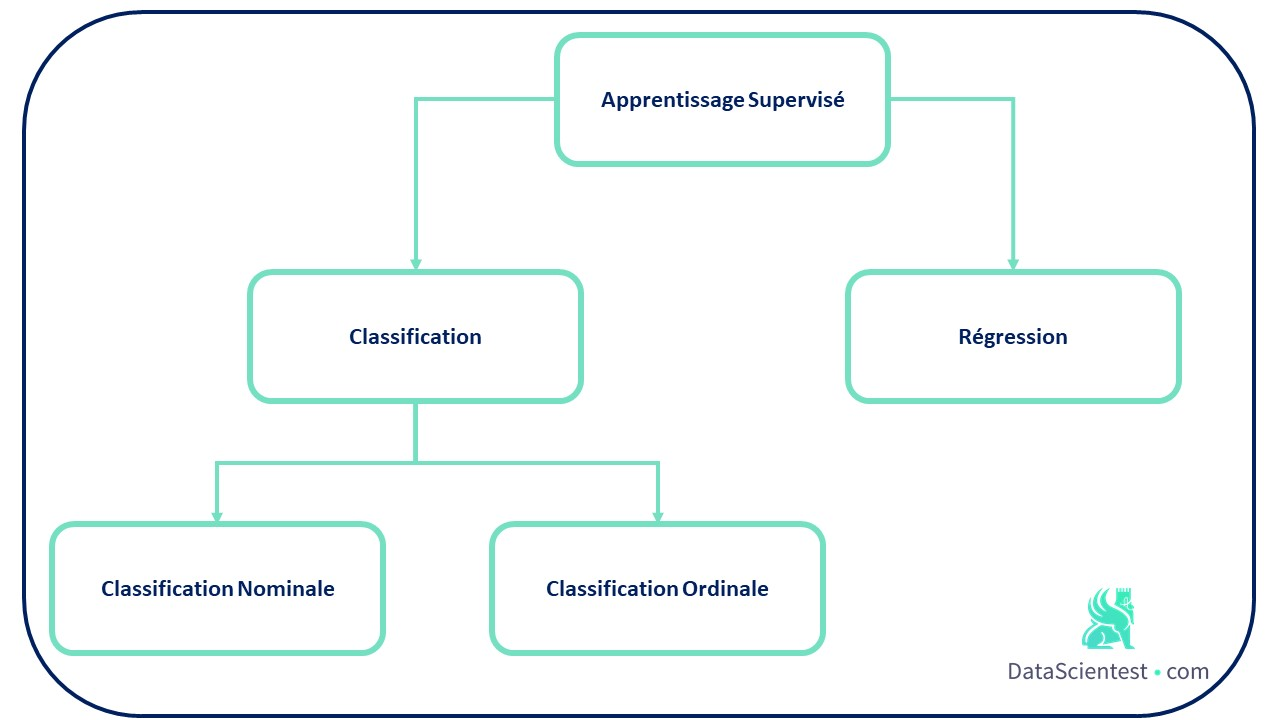


Ce cours détaille la classification en tant que problème d'apprentissage supervisé en utilisant des algorithmes très utilisés par les data scientists, comme :
    - La classification à l'aide de la régression logistique
    - Les séparateurs à vaste marge, en anglais support vector machine (SVM)
    - La méthode des k plus proches voisins (KNN)
    - Les arbres de décision
    - Les forêts aléatoires, en anglais Random Forest

        Mécanisme d'apprentissage
        
En apprentissage supervisé, il faut systématiquement représenter les données sous la forme d'une feature matrix, qui stocke les attributs ou les critères permettant d'entraîner un modèle, et d'un label vector, qui contient les classes correspondantes à chaque échantillon.

Afin d'avoir une intuition sur la qualité et les performances d'un modèle de classification, il faut au préalable séparer le data set en deux : 
Le premier set est l'ensemble d'entraînement (train set), qui constitue la base d'apprentissage sur laquelle le modèle est entraîné. 
Le deuxième set est l'ensemble de test, (en anglais test set), sur lequel la performance du modèle est calculée. 
Dans les deux cas, les classes correspondant à chaque échantillon sont connues a priori.


Après avoir lancé le mécanisme d'apprentissage, il est alors possible d'effectuer des prédictions pour les données présentes dans le test set, et construire une matrice de confusion, qui distingue tous les cas de bonnes ou mauvaise classification pour chaque classe. La plupart des scores et métriques de performance d'un modèle se calculent à partir de cette matrice.

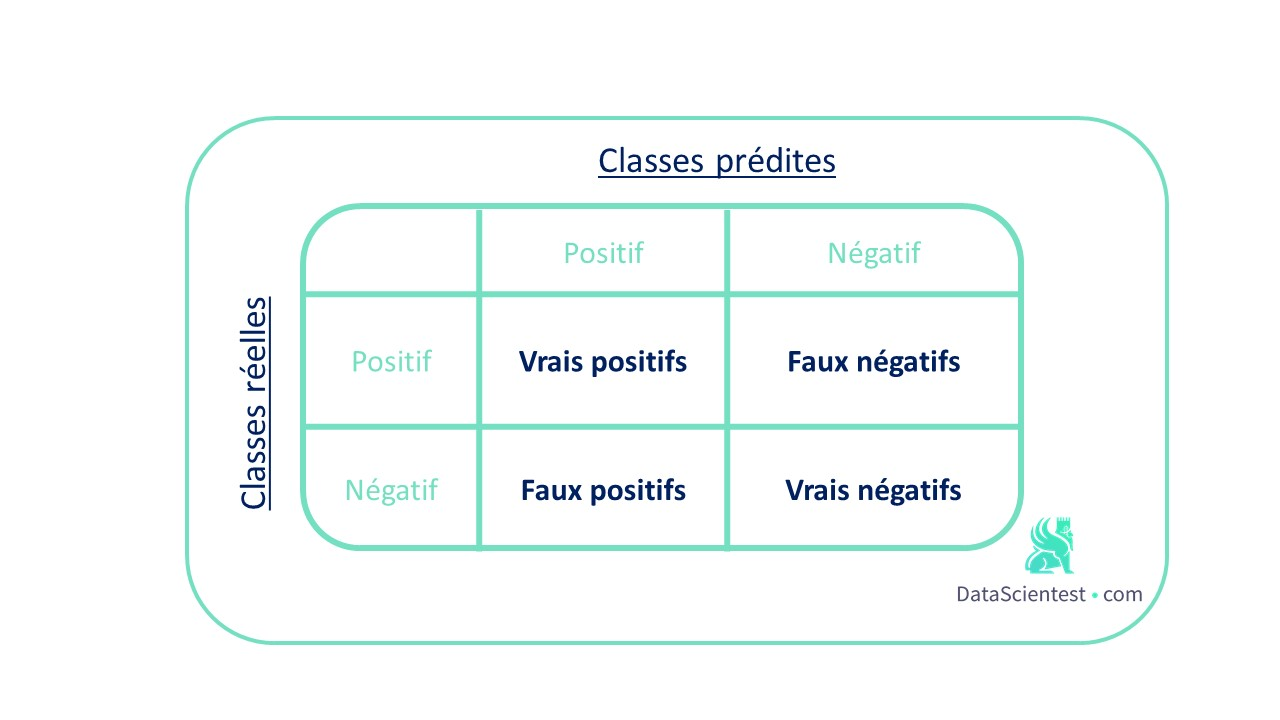

La matrice de confusion permet d'évaluer le modèle de classification et ainsi de sélectionner les meilleurs modèles et paramètres à utiliser. Dans le cadre d'optimisation des paramètres, plusieurs techniques sont utilisées en data science que nous découvrirons dans la suite de ce cours.

        Classification en classes multiples
        
Bien que la plupart des techniques de machine learning concernent des cas de classification binaire, il est possible d'adresser des problèmes "multi-classes". En général, un problème multi-classe est décomposé en plusieurs sous-problèmes binaires selon l'une des deux stratégies possibles présentées ci-dessous :



Un contre tous (One-vs-all) : 
Les individus d'une classe donnée sont séparés de tous les autres. En d'autres termes, les éléments d'une classe sont comparés avec les autres éléments des autres classes. La classe d'un individu est alors donnée à partir des résultats de chaque sous-modèle de classification binaire.
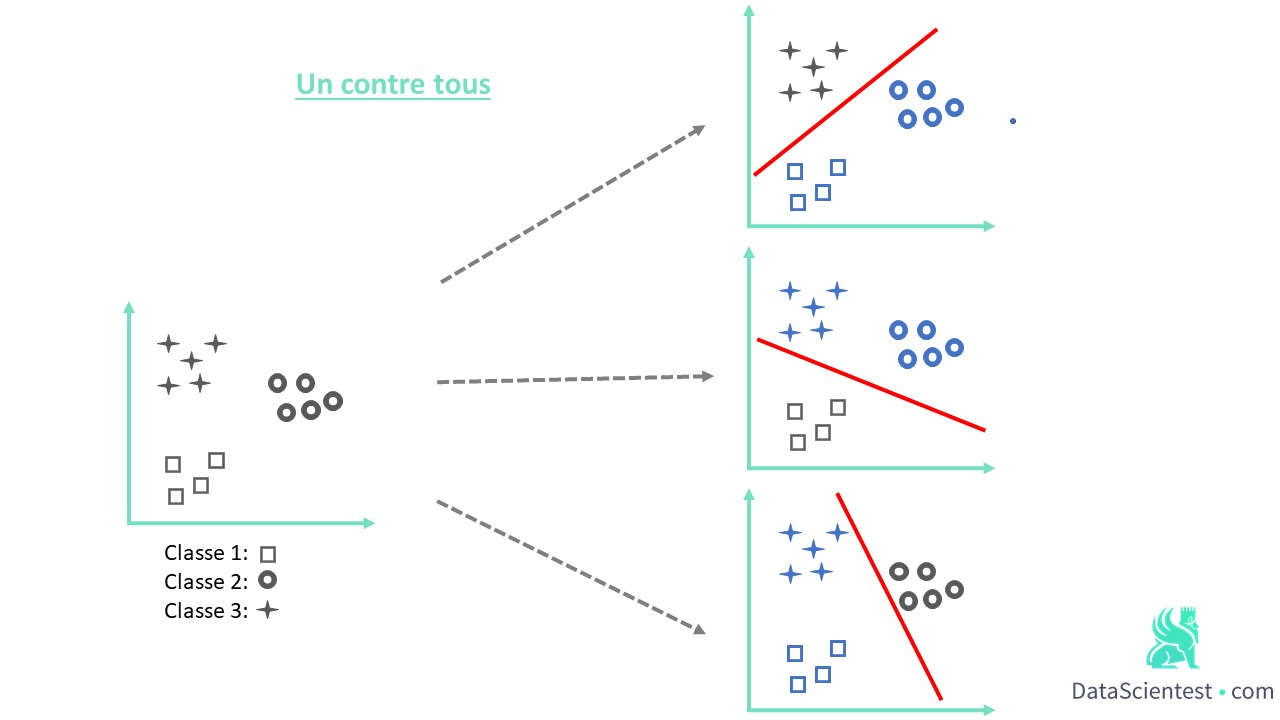

Un contre un (One-vs-one) : 
Dans cette méthode (OvO), pour un problème de classification à K classes, on entraîne K(K - 1)/2 classifieurs binaires; chacun reçoit les échantillons d'une paire de classes de l'ensemble d'entraînement original, et doit apprendre à distinguer ces deux classes. Au moment de la prédiction, un schéma de vote est appliqué : tous les K(K - 1)/2 classifieurs sont appliqués à un nouvel échantillon et la classe qui a obtenu le plus grand nombre de prédictions est choisie par le modèle de classification combiné .
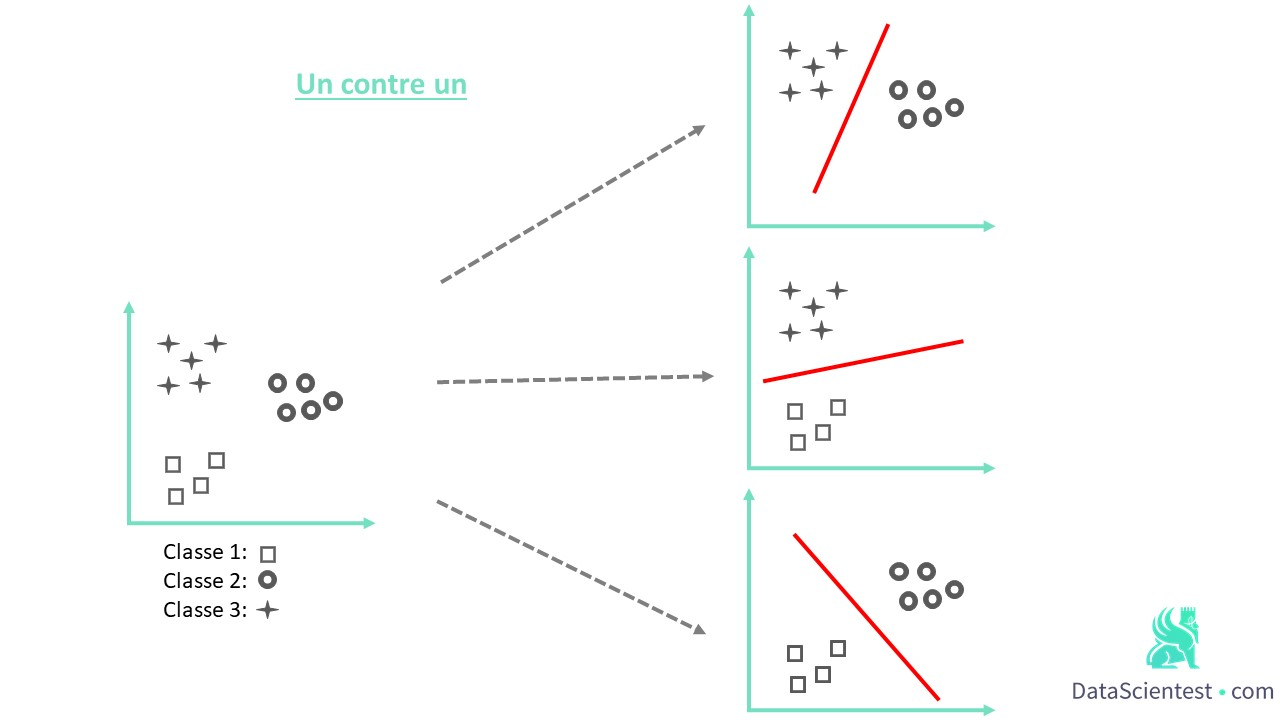

        Module 3 : xx

-------------------------------------------------------------------------------------------------------------------------------

        Module 4 : xx

-------------------------------------------------------------------------------------------------------------------------------

Une étude s'intéresse à l'efficacité énergétique d'immeubles résidentiels, en particulier les besoins en chauffage et en climatisation, en fonction de caractéristiques architecturales comme la surface des murs, la surface vitrée, l'orientation, etc..

Le jeu de données utilisé contient huit attributs décrivant ces caractéristiques concernant 768 immeubles et 2 attributs cibles : les charges de chauffage et les charges de climatisation de ces immeubles.

L'objectif de l'exercice consiste à prédire les charges de chaque immeuble, en fonction des huit premiers attributs.

Le jeu de données est à lire dans le fichier "ENB_data.csv". Notez que les colonnes sont séparées par des ';'.

Exécutez la cellule suivante pour importer les packages nécessaires à l'exercice.
Chargez le fichier "ENB_data.csv" et effectuez un premier audit des données dans un data frame df.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import ensemble
from sklearn import svm
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### Insérez votre code ici

df = pd.read_csv ('ENB_data.csv', sep = ';')
df.head()

#df['glazing_area'].value_counts()

Analysez les corrélations entre toutes les variables de df.
Quelles variables explicatives sont les plus corrélées aux deux variables cibles ?

In [ ]:

df.corr()

df.info()

#  'overall_height', 'relative_compactness'; 'glazing_area'


La suite consiste à présent à créer un modèle de classification optimal après regroupement des immeubles en classes à partir des charges énergétiques totales (chauffage + climatisation).

Créez une nouvelle colonne à df, appelée total_charges, totalisant pour chaque immeuble les charges de chauffage et de climatisation.
Dans une nouvelle variable charges_classes, découpez les immeubles en 4 classes distinctes avec pour labels 0, 1, 2, 3 selon les 3 quantiles de la nouvelle variable crée.

In [ ]:
df ['total_charges'] = df ['heating_load'] + df ['cooling_load']


df['charges_classes'] = pd.qcut(df ['total_charges'],q = [0, .25, .5, .75, 1.] , labels = [0, 1, 2, 3 ]  )

df.head()

Stockez dans une variable data, les données explicatives uniquement.
Séparez les données en un ensemble d'apprentissage et un ensemble de test (20%), avec data comme données explicatives et charges_classes comme variable cible.
Centrer et réduire les variables explicatives des deux échantillons de manière adéquate.

Centrer et réduire les variables explicatives des deux échantillons de manière adéquate.

In [ ]:
data = df.loc [0:, ['overall_height', 'relative_compactness', 'glazing_area']]

target = df['charges_classes']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)


Dans la suite nous allons comparer plusieurs méthodes d'apprentissage. Pour chacune d'elles, il conviendra d'explorer le périmètre des hyperparamètres suivant :


K-plus proches voisins. Hyperparamètre à régler :

'n_neighbors' : 2 à 50.



SVM. Hyperparamètres à régler :

kernel : 'rbf', 'linear'.
C : 0.1 ; 1 ; 10 ; 50 .


RandomForest. Hyperparamètres à régler :

'max_features': "sqrt", "log2", None
'min_samples_split': Nombres pairs allant de 2 à 30.


Pour chaque algorithme mentionné ci-dessus:

Sélectionnez les hyperparamètres sur l'échantillon d’apprentissage par validation croisée
Affichez les hyperparamètres retenus
Appliquez le modèle à l'ensemble de test, affichez la matrice de confusion et le score du modèle sur ce dernier

Quel modèle fournit la meilleure précision ?

SVM. Hyperparamètres à régler :

kernel : 'rbf', 'linear'.
C : 0.1 ; 1 ; 10 ; 50 .

Nous allons maintenant créer une méthode d'ensemble

Créez vc, une instance de la classe VotingClassifier qui prend en paramètre les trois modèles retenus précédemment et qui utilise le mode de vote hard

Ce modèle fournit-il une meilleure précision ?

In [ ]:
vc = VotingClassifier(estimators=[('knn', clf1), ('svm', clf2),('rf', clf3)],  voting='hard') 

vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)  

print (vc.score(X_test, y_test))

pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite']) 

In [ ]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import ensemble
from sklearn import svm
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import  KFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### Insérez votre code ici

df = pd.read_csv ('ENB_data.csv', sep = ';')
df.head()
#df

#df['relative_compactness'].value_counts()

In [ ]:
### Insérez votre code ici

df.corr()

# relative_compactness (surface_area)
# overall_height (roof_area)

# wall_area


In [ ]:
### Insérez votre code ici 

df ['total_charges'] = df ['heating_load'] + df ['cooling_load']


df['charges_classes'] = pd.qcut(df ['total_charges'],q = [0, .25, .5, .75, 1.] , labels = [0, 1, 2, 3 ]  )

df.head()

In [ ]:
### Insérez votre code ici

data = df.iloc [0:, :7]

target = df['charges_classes']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)



In [ ]:
#la bonne reponse est la formule GridSearchCV,


#ne pas utiliser les reponses ci dessous c est faux 

In [ ]:
### Insérez votre code ici


# faux il faut utiliser la formule GridSearchCV,


#clf1 = KNeighborsClassifier(n_neighbors=2)

#clf1.fit(X_train, y_train)

#y_pred = clf1.predict(X_test)  

#print (clf1.score(X_test, y_test))

#pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite']) 



#liste = []
#for i in range (2,50):
#    clf1 = KNeighborsClassifier(n_neighbors=i)
#    clf1.fit(X_train, y_train)
#    liste.append(clf1.score(X_test, y_test))
    #print ('pour le n_neighbors=', i, ':', clf1.score(X_test, y_test))

#max (liste) 

#clf1 = KNeighborsClassifier(n_neighbors=3)  # on prend n = 3

#clf1.fit(X_train, y_train)

#y_pred = clf1.predict(X_test)  

#print (clf1.score(X_test, y_test))

#pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite']) 



### Insérez votre code ici

#clf2 = svm.SVC (gamma = 0.01 , kernel = 'poly')
#clf2.fit (X_train , y_train)
#y_pred = clf2.predict (X_test)
#print (clf2.score(X_test, y_test))
#pd.crosstab( y_test, y_pred ,  rownames=['Classe réelle'], colnames=['Classe prédite'])



#parametres = {'C' : [0.1,1,10, 50], 'kernel': ['rbf', 'linear'] , 'gamma' : [0.001, 0.1, 0.5]}
#grid_clf = model_selection.GridSearchCV(clf2 , param_grid = parametres) 
#grille = grid_clf.fit(X_train, y_train)
#print(grid_clf.best_params_)
#print (grid_clf.score(X_test, y_test))
#y_pred = grid_clf.predict(X_test)
#pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])


#on prend 
#parametres = {'C': 50, 'gamma': 0.1, 'kernel': 'rbf'}

#clf2 = svm.SVC (C = 50 , gamma = 0.1 , kernel = 'rbf')
#clf2.fit (X_train , y_train)
#y_pred = clf2.predict (X_test)
#print (clf2.score(X_test, y_test))
#pd.crosstab( y_test, y_pred ,  rownames=['Classe réelle'], colnames=['Classe prédite'])


#clf3 = RandomForestClassifier(random_state= 123  )
#clf3.fit(X_train , y_train) # Entraîner l'algorithme
#y_pred = clf3.predict (X_test)
#print (clf3.score(X_test, y_test) )
#pd.crosstab(y_test, y_pred , rownames = ['Classe réelle'], colnames = ['Classe prédite']) 


### Insérez votre code ici

#liste = []

#for i in ["sqrt", "log2", None] : 
#    for y in range (2,31,2):

#        clf3 = RandomForestClassifier(random_state= 123 , max_features = i , min_samples_split = y )
#        clf3.fit(X_train, y_train)
#        liste.append(clf3.score(X_test, y_test))
#        #print ('max_features =', i ,' min_samples_split =', y,':',clf3.score(X_test, y_test))
#        liste.append(clf3.score(X_test, y_test))
   
#max (liste) 

# max_features = None  min_samples_split = 2 : 0.948051948051948

#clf3 = RandomForestClassifier(random_state= 123 , max_features = None , min_samples_split = 2 )
#clf3.fit(X_train , y_train) # Entraîner l'algorithme
#y_pred = clf3.predict (X_test)
#print (clf3.score(X_test, y_test) )
#pd.crosstab(y_test, y_pred , rownames = ['Classe réelle'], colnames = ['Classe prédite']) 

In [ ]:
#ils ont tous de bon resultat
#SVM est le modele le plus precis 0.948051948051948

In [ ]:
### Insérez votre code ici 

vc = VotingClassifier(estimators=[('knn', clf1), ('svm', clf2),('rf', clf3)],  voting='hard') 

vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)  

print (vc.score(X_test, y_test))

pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite']) 


#il est aussi precis que SVM